# Bull or Bear Betas
#### Beta is a measurement of how much a stock's movement is affected by the movement of the market. A high beta means that a stock moves more, so on the market's up days that stock's returns would be higher than that of the market, but on down days its returns would be worse.
#### Beta is usually just a single measurement, often used in risk management. This project examines how stocks move in different market conditions. A bull market, is when a market is going up, and a bear market is when the market is falling. We will get two betas for each stock, one for when the market is a bull market, the other for when it is a bear market. 
#### When a stock has a high bull-beta, that stock's returns are better than the market, which is good. In contrast, a high bear-beta is bad, as the stock's returns are worse when the market is down.

In [34]:
import pandas as pd
import yfinance as yf
df = pd.read_csv("https://datahub.io/core/s-and-p-500-companies/r/constituents.csv")
sp500_tickers = df["Symbol"].tolist()
SP500=yf.download("^GSPC", start = '2020-07-24', end = '2025-07-24')
SP500.dropna(inplace = True)

/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/760376364.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  SP500=yf.download("^GSPC", start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


In [35]:
mydf = pd.DataFrame()
mydf["Close"] = SP500["Close"]
mydf["Prev"]= SP500["Close"].shift(1)
mydf["Returns"] = mydf["Close"].pct_change()
mydf.dropna(inplace = True)
BullorBear = []
updf = pd.DataFrame(columns = ["Returns"])
downdf = pd.DataFrame(columns = ["Returns"])
for row in mydf.itertuples(index=True):
    if row.Close-row.Prev>=0:
        BullorBear.append(1)
        updf.loc[len(updf)] = [row.Returns]
    else:
        BullorBear.append(0)
        downdf.loc[len(downdf)] = [row.Returns]

In [36]:
Ticker_Dict={}
regular_betas = {}
j=1
for ticker in sp500_tickers:
    print(j)
    i =0
    temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
    temp["Returns"] = temp["Close"].pct_change()
    
    del temp["Open"]
    del temp["High"]
    del temp["Low"]
    del temp["Volume"]
    temp.dropna(inplace = True)
    tempup = pd.DataFrame(columns=["Returns"])
    tempdown = pd.DataFrame(columns=["Returns"])
    j+=1
    i = 0
    if len(temp["Returns"])==len(BullorBear):
        for row in temp.itertuples(index=True):
            if BullorBear[i]==1:
                tempup.loc[len(tempup)] = row[2]

            else:
                tempdown.loc[len(tempdown)] = row[2]

            i+=1
        upB = tempup["Returns"].cov(updf["Returns"])/updf["Returns"].var()
        downB = tempdown["Returns"].cov(downdf["Returns"])/downdf["Returns"].var()
        Ticker_Dict[ticker]= [upB,downB]
        regular_betas[ticker] = temp["Returns"].cov(mydf["Returns"])/mydf["Returns"].var()


    

1


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


2


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


3


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


4


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


5


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


6


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


7


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


8


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


9


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


10


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


11


[*********************100%***********************]  1 of 1 completed


12


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


13


[*********************100%***********************]  1 of 1 completed


14


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


15


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


16


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


17


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


18


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


19


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


20


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


21


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


22


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


23


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


24


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


25


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


26


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


27


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


28


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


29


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


30


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


31


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


32


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


33


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


34


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


35


[*********************100%***********************]  1 of 1 completed


36


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


37


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


38


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


39


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


40


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


41


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


42


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


43


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


44


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


45


[*********************100%***********************]  1 of 1 completed


46


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


47


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


48


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


49


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


50


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


51


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


52


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


53


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


54


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


55


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


56


[*********************100%***********************]  1 of 1 completed


57


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


58


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


59


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


60


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


61


[*********************100%***********************]  1 of 1 completed


62


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


63


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


64


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


65


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


66


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


67


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


68


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


69


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


70


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


71


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


72


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


73


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


74


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


75


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-07-24 -> 2025-07-24)')
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


76


[*********************100%***********************]  1 of 1 completed


77


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


78


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


79


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


80


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


81


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


82


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


83


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


84


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


85


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


86


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


87


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


88


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


89


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


90


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


91


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


92


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


93


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


94


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


95


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


96


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


97


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


98


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


99


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


100


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


101


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


102


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


103


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


104


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


105


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


106


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


107


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


108


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


109


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


110


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


111


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


112


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


113


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


114


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


115


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


116


[*********************100%***********************]  1 of 1 completed


117


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


118


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


119


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


120


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


121


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


122


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


123


[*********************100%***********************]  1 of 1 completed


124


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


125


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


126


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


127


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


128


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


129


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


130


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


131


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


132


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


133


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


134


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


135


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


136


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


137


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


138


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


139


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


140


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


141


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


142


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


143


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


144


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


145


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


146


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


147


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


148


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


149


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


150


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


151


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


152


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


153


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


154


[*********************100%***********************]  1 of 1 completed


155


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


156


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


157


[*********************100%***********************]  1 of 1 completed


158


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


159


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


160


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


161


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


162


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


163


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


164


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


165


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


166


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


167


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


168


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


169


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


170


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


171


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


172


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


173


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


174


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


175


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


176


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


177


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


178


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


179


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


180


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


181


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


182


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


183


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


184


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


185


[*********************100%***********************]  1 of 1 completed


186


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


187


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


188


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


189


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


190


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


191


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


192


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


193


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


194


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


195


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


196


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


197


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


198


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


199


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


200


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


201


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


202


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


203


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


204


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


205


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


206


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


207


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


208


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


209


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


210


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


211


[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


212


[*********************100%***********************]  1 of 1 completed


213


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


214


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


215


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


216


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


217


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


218


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


219


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


220


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


221


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


222


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


223


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


224


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


225


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


226


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


227


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


228


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


229


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


230


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


231


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


232


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


233


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


234


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


235


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


236


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


237


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


238


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


239


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


240


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


241


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


242


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


243


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


244


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


245


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


246


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


247


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


248


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


249


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


250


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


251


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


252


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


253


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


254


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


255


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


256


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


257


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


258


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


259


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


260


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


261


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


262


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


263


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


264


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


265


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


266


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


267


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


268


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


269


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


270


[*********************100%***********************]  1 of 1 completed


271


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


272


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


273


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


274


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


275


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


276


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


277


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


278


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


279


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


280


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


281


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


282


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


283


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


284


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


285


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


286


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


287


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


288


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


289


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


290


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


291


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


292


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


293


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


294


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


295


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


296


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


297


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


298


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


299


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


300


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


301


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


302


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


303


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


304


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


305


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


306


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


307


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


308


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


309


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


310


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


311


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


312


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


313


[*********************100%***********************]  1 of 1 completed


314


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


315


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


316


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


317


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


318


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


319


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


320


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


321


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


322


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


323


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


324


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


325


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


326


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


327


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


328


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


329


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


330


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


331


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


332


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


333


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


334


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


335


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


336


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


337


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


338


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


339


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


340


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


341


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


342


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


343


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


344


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


345


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


346


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


347


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


348


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


349


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


350


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


351


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


352


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


353


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


354


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


355


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


356


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


357


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


358


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


359


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


360


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


361


[*********************100%***********************]  1 of 1 completed


362


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


363


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


364


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


365


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


366


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


367


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


368


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


369


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


370


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


371


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


372


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


373


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


374


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


375


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


376


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


377


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


378


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


379


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


380


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


381


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


382


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


383


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


384


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


385


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


386


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


387


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


388


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


389


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


390


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


391


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


392


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


393


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


394


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


395


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


396


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


397


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


398


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


399


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


400


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


401


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


402


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


403


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


404


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


405


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


406


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


407


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


408


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


409


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


410


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


411


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


412


[*********************100%***********************]  1 of 1 completed


413


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


414


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


415


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


416


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


417


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


418


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


419


[*********************100%***********************]  1 of 1 completed


420


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


421


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


422


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


423


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


424


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


425


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


426


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


427


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


428


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


429


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


430


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


431


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


432


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


433


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


434


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


435


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


436


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


437


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


438


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


439


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


440


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


441


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


442


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


443


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


444


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


445


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


446


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


447


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


448


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


449


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


450


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


451


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


452


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


453


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


454


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


455


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


456


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


457


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


458


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


459


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


460


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


461


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


462


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


463


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


464


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


465


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


466


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


467


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


468


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')


469


[*********************100%***********************]  1 of 1 completed


470


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


471


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


472


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


473


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


474


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


475


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


476


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


477


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


478


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


479


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


480


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


481


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


482


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


483


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


484


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


485


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


486


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


487


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


488


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


489


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


490


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


491


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


492


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


493


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


494


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


495


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


496


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


497


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


498


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


499


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


500


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


501


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


502


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


503


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_35480/962940363.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  temp = yf.download(ticker, start = '2020-07-24', end = '2025-07-24')
[*********************100%***********************]  1 of 1 completed


# Examination of Results
#### First let's examine the regular beta. 

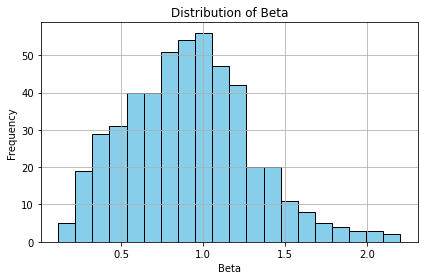

In [46]:
# Extract values
values = list(regular_betas.values())

# Plot histogram
plt.figure(figsize=(6,4))
plt.hist(values, bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.title('Distribution of Beta')
plt.grid(True)
plt.tight_layout()
plt.show()

#### As we could've predicted, the distribution of beta is centered around 1. This suggests that many companies in the S&P 500 move roughly in line with the market.

#### Next let's examine the extremes, starting with companies that have a low beta.

In [63]:
sorted_regular_betas = dict(sorted(regular_betas.items(), key=lambda item: item[1]))
sorted_keys_betas = list(sorted_regular_betas.keys())
lowest_betas_sectors = {}
for t in sorted_keys_betas[:25]:
    if yf.Ticker(t).info['sector'] in lowest_betas_sectors:
        lowest_betas_sectors[yf.Ticker(t).info['sector']]+=1
    else:
        lowest_betas_sectors[yf.Ticker(t).info['sector']] = 1


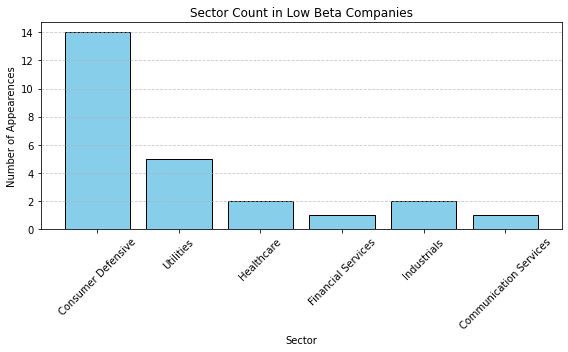

In [66]:
plt.figure(figsize=(8,5))
plt.bar(lowest_betas_sectors.keys(), lowest_betas_sectors.values(), color='skyblue', edgecolor='black')
plt.xlabel('Sector')
plt.ylabel('Number of Appearences')
plt.title('Sector Count in Low Beta Companies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### It is easy to see that companies which are consumer staples or utilities tend to have lower beta. This is because those companies produce essential goods and items, that are important enough that people by them no matter the market conditions. 

#### Next, lets look at stocks which have high betas, and see if we can spot any similar patterns.

In [68]:
highest_betas_sectors = {}
for t in sorted_keys_betas[465:]:
    if yf.Ticker(t).info['sector'] in highest_betas_sectors:
        highest_betas_sectors[yf.Ticker(t).info['sector']]+=1
    else:
        highest_betas_sectors[yf.Ticker(t).info['sector']] = 1


{'Financial Services': 2, 'Technology': 15, 'Industrials': 1, 'Communication Services': 2, 'Consumer Cyclical': 5}


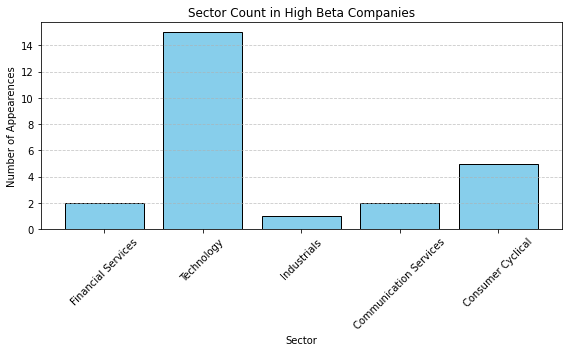

In [69]:
plt.figure(figsize=(8,5))
plt.bar(highest_betas_sectors.keys(), highest_betas_sectors.values(), color='skyblue', edgecolor='black')
plt.xlabel('Sector')
plt.ylabel('Number of Appearences')
plt.title('Sector Count in High Beta Companies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Again, its easy to spot that tech companies tend to have high betas. One reason for this is because tech companies are seen to have a lot of potential for future growth, so there is a lot of hype around them. Another interesting column is consumer cyclical. These companies tend to produce luxury items and non-essential goods, i.e. they produce goods that people buy a lot more of when the market is doing well, but less of when it isn't.

#### Next, lets focus on the bull and bear betas. We'll start with a scatter plot of bull vs bear betas for each company.

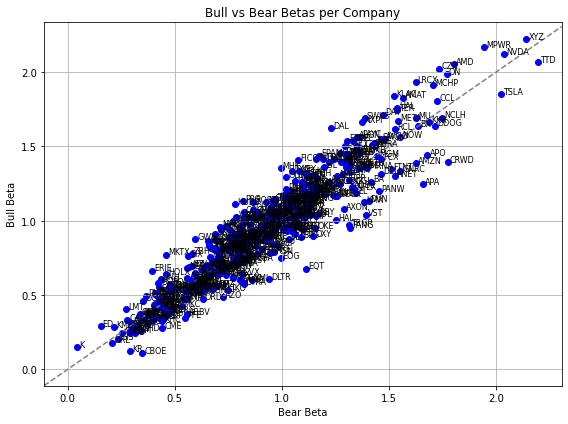

In [70]:
import matplotlib.pyplot as plt

# Unpack data
tickers = list(Ticker_Dict.keys())
bull_betas = [Ticker_Dict[t][0] for t in tickers]
bear_betas = [Ticker_Dict[t][1] for t in tickers]

# Plot
plt.figure(figsize=(8,6))
plt.scatter(bear_betas, bull_betas, color='blue')

# Add labels (optional)
for i, ticker in enumerate(tickers):
    plt.text(bear_betas[i] + 0.01, bull_betas[i], ticker, fontsize=8)

# Formatting
plt.xlabel('Bear Beta')
plt.ylabel('Bull Beta')
plt.title('Bull vs Bear Betas per Company')
plt.axline((0, 0), slope=1, color='gray', linestyle='--')  # y = x reference line
plt.grid(True)
plt.tight_layout()
plt.show()

#### As we expect, most stocks sit around the y=x line, i.e., there bull and bear beta values are very similar. First, lets look at companies with the best and worst ratio of beta. Then, we'll examine the actual spread. 

In [40]:
beta_ratio = {}
positive_betas = {}
negative_betas = {}

for key in Ticker_Dict:
    if Ticker_Dict[key][0] <0:
        Negative_bulls.append(key)
    elif Ticker_Dict[key][0] <0:
        Negative_bears.append(key)
    beta_ratio[key] = Ticker_Dict[key][0]/Ticker_Dict[key][1]
    
    positive_betas[key] = Ticker_Dict[key][0]
    
    negative_betas[key] = Ticker_Dict[key][1]

In [77]:
sorted_beta_ratio = dict(sorted(beta_ratio.items(), key=lambda item: item[1]))
sorted_beta_ratio_keys = list(sorted_beta_ratio.keys())

{'CBOE': 0.31627967441934307,
 'KR': 0.4136761077073663,
 'EQT': 0.6071479499839412,
 'CME': 0.6249259343700967,
 'PFE': 0.6361798112650566,
 'DLTR': 0.6436226878284117,
 'ABBV': 0.6667180718147128,
 'AZO': 0.66982134070755,
 'KMI': 0.698121486192428,
 'CTRA': 0.6983728706917606,
 'TKO': 0.7092270149475932,
 'WMB': 0.7213976499352429,
 'FANG': 0.7225311786070986,
 'KHC': 0.7394451016970547,
 'TRGP': 0.7404703822361229,
 'GEN': 0.7457141760956562,
 'VST': 0.7464216198450657,
 'APA': 0.749921127771767,
 'ORLY': 0.7523326765229249,
 'EOG': 0.7542051848814215,
 'CHD': 0.7621013826227867,
 'KDP': 0.7677516646887347,
 'OXY': 0.7801012265320093,
 'SJM': 0.7855145565763338,
 'CRWD': 0.7858185236713524,
 'CVX': 0.7913671280333249,
 'WELL': 0.7918075210038832,
 'ICE': 0.7950508945589458,
 'MKC': 0.7958205399635068,
 'EVRG': 0.7969946558537915,
 'HAL': 0.8018716579351128,
 'DPZ': 0.803482308136914,
 'DVN': 0.8038850867290228,
 'FE': 0.805044149627733,
 'MCK': 0.8077856675503299,
 'RTX': 0.8078069

In [79]:
lowest_br_sectors = {}
for t in sorted_beta_ratio_keys[:25]:
    if yf.Ticker(t).info['sector'] in lowest_br_sectors:
        lowest_br_sectors[yf.Ticker(t).info['sector']]+=1
    else:
        lowest_br_sectors[yf.Ticker(t).info['sector']] = 1

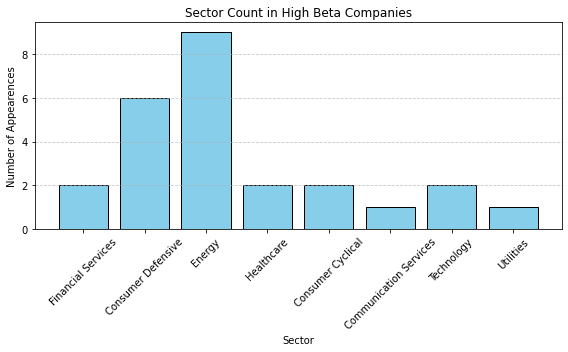

In [80]:
plt.figure(figsize=(8,5))
plt.bar(lowest_br_sectors.keys(), lowest_br_sectors.values(), color='skyblue', edgecolor='black')
plt.xlabel('Sector')
plt.ylabel('Number of Appearences')
plt.title('Sector Count in low BR Companies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Here, we have the sectors with the most companies that have low beta ratios. The beta ratio is $\frac{ \beta_{Bull}}{ \beta_{Bear}}$, we would rather have companies with high beta ratios. One reason we see a lot of energy companies is that energy and commodities like oil, tend to move because of global events, not necessarily the market. These moves tend to have massive downside. Furthermore, energy companies have been under a lot fo pressure the past few years because of global warming and ESG governance. 

In [81]:
highest_br_sectors = {}
for t in sorted_beta_ratio_keys[465:]:
    if yf.Ticker(t).info['sector'] in highest_br_sectors:
        highest_br_sectors[yf.Ticker(t).info['sector']]+=1
    else:
        highest_br_sectors[yf.Ticker(t).info['sector']] = 1

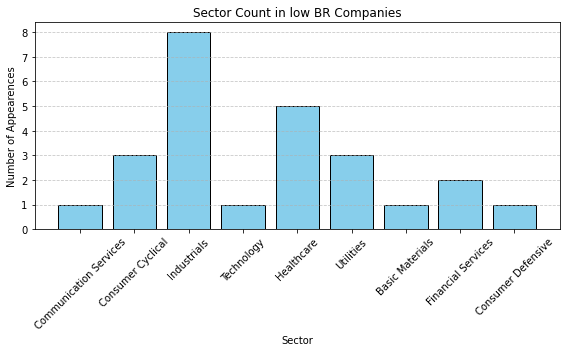

In [82]:
plt.figure(figsize=(8,5))
plt.bar(highest_br_sectors.keys(), highest_br_sectors.values(), color='skyblue', edgecolor='black')
plt.xlabel('Sector')
plt.ylabel('Number of Appearences')
plt.title('Sector Count in low BR Companies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### The Industrial sector has a lot of companies with a good beta ratio. This makes sense because when the market is doing well, other comapnies are buying a lot of materials and machines from the industrial sector. The healthcare sector, is rather defensive when the market isn't doing well because people always need healthcare. 